# Spurious Correlations

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
seed = 42
np.random.seed(seed)
rng = np.random.RandomState(seed)

In [3]:
# Non-linear
n_samples = 1000
de_linearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos( 5 * np.pi * X )
x1 = np.sort(np.random.rand(n_samples)) * 2
y1 = de_linearize(x1) + np.random.randn(n_samples) * 0.1

In [4]:
# Outliers
noise = 20
x2, y2 = make_regression(
    n_samples=n_samples-noise,
    n_features=1,
    noise=noise, 
    bias=100.0,
    random_state=seed,
)

x_outliers = rng.normal(0, 0.5, size=(noise, 1))
y_outliers = rng.normal(0, 5.0, size=noise)
x_outliers[:2, :] += x2.max() + x2.mean() / noise
x_outliers[2:, :] += x2.min() - x2.mean() / noise
y_outliers[:2] += y2.min() - y2.mean() / noise
y_outliers[2:] += y2.max() + y2.mean() / noise
x2 = np.vstack((x2, x_outliers)).flatten()
y2 = np.concatenate((y2, y_outliers)).flatten()


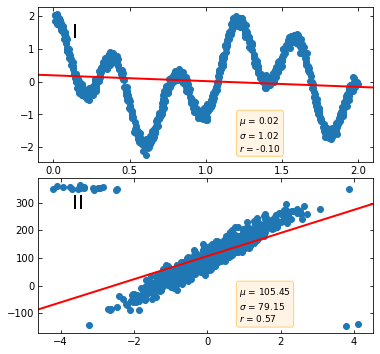

In [5]:

datasets = {
    'I': (x1, y1),
    'II': (x2, y2),
}

fig, axs = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.1})
axs[0].set(xticks=(0, 0.5, 1., 1.5, 2.))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.6, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, ha='left')
    
plt.show()